In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [36]:
SEED = 42

In [37]:
# Initialize different RNG algorithms

bg_mt19937=    np.random.MT19937(SEED) 
bg_pcg64=      np.random.PCG64(SEED)
bg_pcg64dxsm=  np.random.PCG64DXSM(SEED)
bg_philox=     np.random.Philox(SEED)
bg_sfc64=      np.random.SFC64(SEED)


In [38]:
# Initialize different RNGs, one for each algorithm

rng_mt19937=     np.random.Generator(bg_mt19937)
rng_pcg64=       np.random.Generator(bg_pcg64)
rng_pcg64dxsm=   np.random.Generator(bg_pcg64dxsm)
rng_philox=      np.random.Generator(bg_philox)
rng_sfc64=       np.random.Generator(bg_sfc64)

all_rngs = [rng_mt19937, rng_pcg64, rng_pcg64dxsm, rng_philox, rng_sfc64]

In [39]:
# Gaussians' parameters
gaussian_parameters = [
                        (-2, 2),
                        (4, 1),
                        (10, 3),
                        (15, 2)
                    ]

# List of probability of drawing from each distribution
choice_weights = np.array([0.15, 0.25, 0.35, 0.25])

In [40]:
#NB: I am avoiding vectorized operations on purpose, since is not clear (to me) how this could affect the rng state evolution

DATASET_SIZE = int(1e6)

samples_from_rng = {}
for rng in all_rngs:
    samples = []
    
    for i in range(DATASET_SIZE):
        choice = rng.choice(a=gaussian_parameters, replace=True, p=choice_weights)
        samples.append(rng.normal(loc=choice[0], scale=np.sqrt(choice[1])))

    samples_from_rng[rng.bit_generator.__class__.__name__] = [samples]


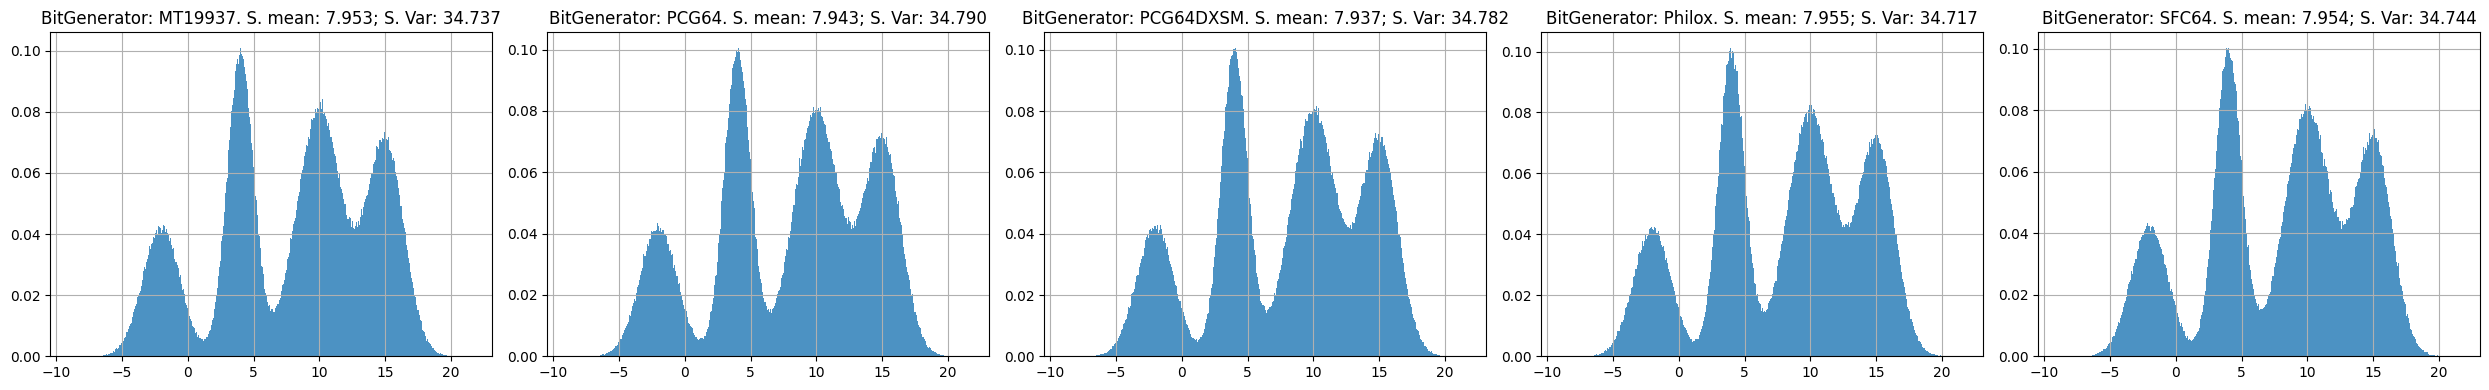

In [41]:
#Plotting from different rng algorithms

n = len(samples_from_rng)

rows = 1
cols = n

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
axes = axes.flatten() 

for ax, (name, samples) in zip(axes, samples_from_rng.items()):
    mean = np.mean(samples)
    var = np.var(samples)
    ax.hist(samples, bins=500, density=True, alpha=0.8)
    ax.set_title(f"BitGenerator: {name}. S. mean: {mean:.3f}; S. Var: {var:.3f}",)
    ax.grid(True)

for i in range(len(samples_from_rng), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Exercise 2

In [42]:
# Initialize different RNGs, one for each algorithm

rng_mt19937=     np.random.Generator(bg_mt19937)
rng_pcg64=       np.random.Generator(bg_pcg64)
rng_pcg64dxsm=   np.random.Generator(bg_pcg64dxsm)
rng_philox=      np.random.Generator(bg_philox)
rng_sfc64=       np.random.Generator(bg_sfc64)

all_rngs = [rng_mt19937, rng_pcg64, rng_pcg64dxsm, rng_philox, rng_sfc64]

In [43]:
# Exponential's parameter
exponential_mean = 1.0

# Uniform's parameters
uniform_low = 0.0
uniform_high = 5.0

In [44]:
#DATASET_SIZE = int(1e6)

samples_from_rng = {}

for rng in all_rngs:
    samples = []
    
    for i in range(DATASET_SIZE):
        sample = {}

        sample['exponential'] = rng.exponential(scale=exponential_mean)
        sample['uniform'] = rng.uniform(low=uniform_low, high=uniform_high)

        samples.append(sample)
        

    samples_from_rng[rng.bit_generator.__class__.__name__] = samples

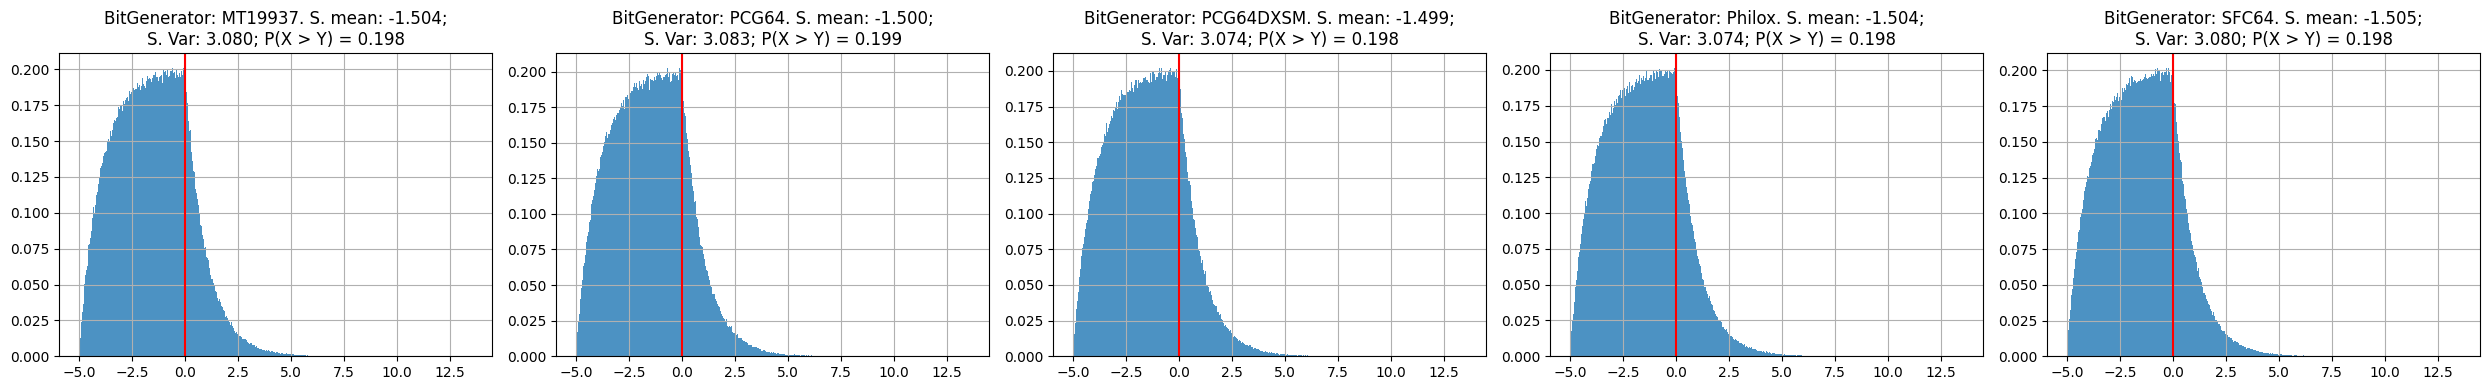

In [45]:
#Plotting from different rng algorithms

n = len(samples_from_rng)

rows = 1
cols = n

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
axes = axes.flatten() 

for ax, (name, samples) in zip(axes, samples_from_rng.items()):
    # Calculate deltas just for plotting
    deltas = [sample['exponential'] - sample['uniform'] for sample in samples]
    mean = np.mean(deltas)
    var = np.var(deltas)

    # Probability of X > Y
    positive_rate = np.sum(np.array(deltas) > 0) / len(deltas)
    ax.hist(deltas, bins=500, density=True, alpha=0.8)
    ax.set_title(f"BitGenerator: {name}. S. mean: {mean:.3f};\nS. Var: {var:.3f}; P(X > Y) = {positive_rate:.3f}",)
    ax.grid(True)

    # Add a vertical red line at x = 0
    ax.axvline(x=0, color='red', linestyle='-', linewidth=1.5)

for i in range(len(samples_from_rng), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()